# Prediksi Curah Hujan Menggunakan Random Forest

Dalam notebook ini, kita akan menggunakan algoritma Random Forest untuk memprediksi apakah besok akan turun hujan atau tidak berdasarkan data cuaca historis dari dataset weatherAUS.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve, roc_auc_score, precision_score, recall_score, f1_score, matthews_corrcoef
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Memuat data
df = pd.read_csv('weatherAUS.csv')
print("Dimensi dataset:", df.shape)
df.head()

Dimensi dataset: (145460, 23)


,Tanggal,Lokasi,SuhuMin,SuhuMax,CurahHujan,Penguapan,SinarMatahari,ArahAnginKencang,KecepatanAnginKencang,ArahAnginJam9,...,KelembabanJam9,KelembabanJam3,TekananUdaraJam9,TekananUdaraJam3,AwanJam9,AwanJam3,SuhuJam9,SuhuJam3,HujanHariIni,HujanBesok
0,2010-04-30,Adelaide,10.8,21.2,0.0,1.8,6.60,ENE,22.0,ENE,...,66.0,48.0,1028.4,1024.7,4.45,4.51,15.7,21.0,No,No
1,2014-07-22,Adelaide,3.7,19.0,0.0,1.4,7.61,N,24.0,N,...,75.0,32.0,1024.2,1021.1,4.45,4.51,9.6,18.5,No,No
2,2014-07-23,Adelaide,9.6,15.8,0.0,2.6,7.61,NE,52.0,NNE,...,35.0,51.0,1017.9,1011.5,4.45,4.51,14.7,15.4,No,Yes
3,2014-07-24,Adelaide,10.1,15.5,16.6,0.8,7.61,NNE,50.0,NW,...,96.0,80.0,1007.4,1008.0,4.45,4.51,11.2,14.0,Yes,Yes
4,2014-07-25,Adelaide,11.2,16.2,1.8,0.6,7.61,NW,30.0,WNW,...,89.0,70.0,1018.4,1019.2,4.45,4.51,13.0,15.3,Yes,Yes


In [8]:
# Menampilkan informasi dasar tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Tanggal                145460 non-null  object 
 1   Lokasi                 145460 non-null  object 
 2   SuhuMin                145460 non-null  float64
 3   SuhuMax                145460 non-null  float64
 4   CurahHujan             145460 non-null  float64
 5   Penguapan              145460 non-null  float64
 6   SinarMatahari          145460 non-null  float64
 7   ArahAnginKencang       145460 non-null  object 
 8   KecepatanAnginKencang  145460 non-null  float64
 9   ArahAnginJam9          145460 non-null  object 
 10  ArahAnginJam3          145460 non-null  object 
 11  KecepatanAnginJam9     145460 non-null  float64
 12  KecepatanAnginJam3     145460 non-null  float64
 13  KelembabanJam9         145460 non-null  float64
 14  KelembabanJam3         145460 non-nu

In [9]:
# Statistik deskriptif dari dataset
df.describe()

,SuhuMin,SuhuMax,CurahHujan,Penguapan,SinarMatahari,KecepatanAnginKencang,KecepatanAnginJam9,KecepatanAnginJam3,KelembabanJam9,KelembabanJam3,TekananUdaraJam9,TekananUdaraJam3,AwanJam9,AwanJam3,SuhuJam9,SuhuJam3
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.193993,23.221337,2.360898,5.468995,7.610612,40.035567,14.043384,18.662601,68.880816,51.539143,1017.649946,1015.256314,4.448437,4.509959,16.990624,21.683306
std,6.365750,7.088124,8.382488,3.161541,2.729486,13.118253,8.861059,8.716581,18.854765,20.471189,6.728467,6.663973,2.265605,2.092954,6.449221,6.850057
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.700000,18.000000,0.000000,4.000000,7.610000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000
50%,12.100000,22.700000,0.000000,5.470000,7.610000,39.000000,13.000000,18.660000,69.000000,51.540000,1017.650000,1015.260000,4.450000,4.510000,16.800000,21.400000
75%,16.800000,28.200000,1.000000,5.470000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [10]:
# Cek nilai yang hilang
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_data = pd.concat([missing_values, missing_percent], axis=1, keys=['Total', 'Persentase'])
missing_data[missing_data['Total'] > 0]

,Total,Persentase


In [11]:
# Membersihkan data
# Menghapus kolom yang tidak diperlukan untuk prediksi
df_clean = df.drop(['Tanggal', 'Lokasi', 'HujanHariIni'], axis=1)

# Mengonversi variabel target ke bentuk numerik
label_encoder = LabelEncoder()
df_clean['HujanBesok'] = label_encoder.fit_transform(df_clean['HujanBesok'])

# Menangani nilai yang hilang dengan mengisi menggunakan median untuk numerik dan modus untuk kategorikal
for column in df_clean.columns:
    if df_clean[column].dtype == 'object':
        df_clean[column] = df_clean[column].fillna(df_clean[column].mode()[0])
    else:
        df_clean[column] = df_clean[column].fillna(df_clean[column].median())

print("Data setelah pembersihan:")
df_clean.isnull().sum().sum()  # Harus menunjukkan 0 nilai yang hilang

Data setelah pembersihan:


np.int64(0)

In [12]:
# Mengonversi fitur kategorikal menjadi numerik
categorical_columns = df_clean.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df_clean[col] = label_encoder.fit_transform(df_clean[col])

df_clean.head()

,SuhuMin,SuhuMax,CurahHujan,Penguapan,SinarMatahari,ArahAnginKencang,KecepatanAnginKencang,ArahAnginJam9,ArahAnginJam3,KecepatanAnginJam9,KecepatanAnginJam3,KelembabanJam9,KelembabanJam3,TekananUdaraJam9,TekananUdaraJam3,AwanJam9,AwanJam3,SuhuJam9,SuhuJam3,HujanBesok
0,10.8,21.2,0.0,1.8,6.60,1,22.0,1,7,9.0,7.0,66.0,48.0,1028.4,1024.7,4.45,4.51,15.7,21.0,0
1,3.7,19.0,0.0,1.4,7.61,3,24.0,3,5,0.0,11.0,75.0,32.0,1024.2,1021.1,4.45,4.51,9.6,18.5,0
2,9.6,15.8,0.0,2.6,7.61,4,52.0,5,4,9.0,20.0,35.0,51.0,1017.9,1011.5,4.45,4.51,14.7,15.4,1
3,10.1,15.5,16.6,0.8,7.61,5,50.0,7,7,17.0,26.0,96.0,80.0,1007.4,1008.0,4.45,4.51,11.2,14.0,1
4,11.2,16.2,1.8,0.6,7.61,7,30.0,14,14,13.0,15.0,89.0,70.0,1018.4,1019.2,4.45,4.51,13.0,15.3,1


In [13]:
# Memisahkan fitur dan target
X = df_clean.drop('HujanBesok', axis=1)
y = df_clean['HujanBesok']

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Ukuran training set: {X_train.shape}")
print(f"Ukuran testing set: {X_test.shape}")

Ukuran training set: (116368, 19)
Ukuran testing set: (29092, 19)


In [14]:
# Membuat dan melatih model Random Forest
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [15]:
# Memprediksi pada data testing
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy:.4f}")

Akurasi model: 0.8458


In [16]:
# Laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=['Tidak Hujan', 'Hujan']))

Laporan Klasifikasi:
              precision    recall  f1-score   support

 Tidak Hujan       0.86      0.96      0.91     22717
       Hujan       0.76      0.44      0.55      6375

    accuracy                           0.85     29092
   macro avg       0.81      0.70      0.73     29092
weighted avg       0.84      0.85      0.83     29092



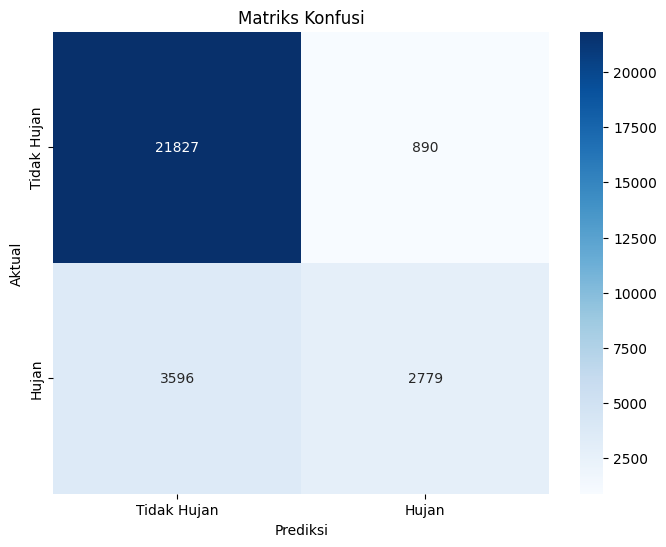

In [17]:
# Matriks konfusi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Hujan', 'Hujan'], yticklabels=['Tidak Hujan', 'Hujan'])
plt.title('Matriks Konfusi')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

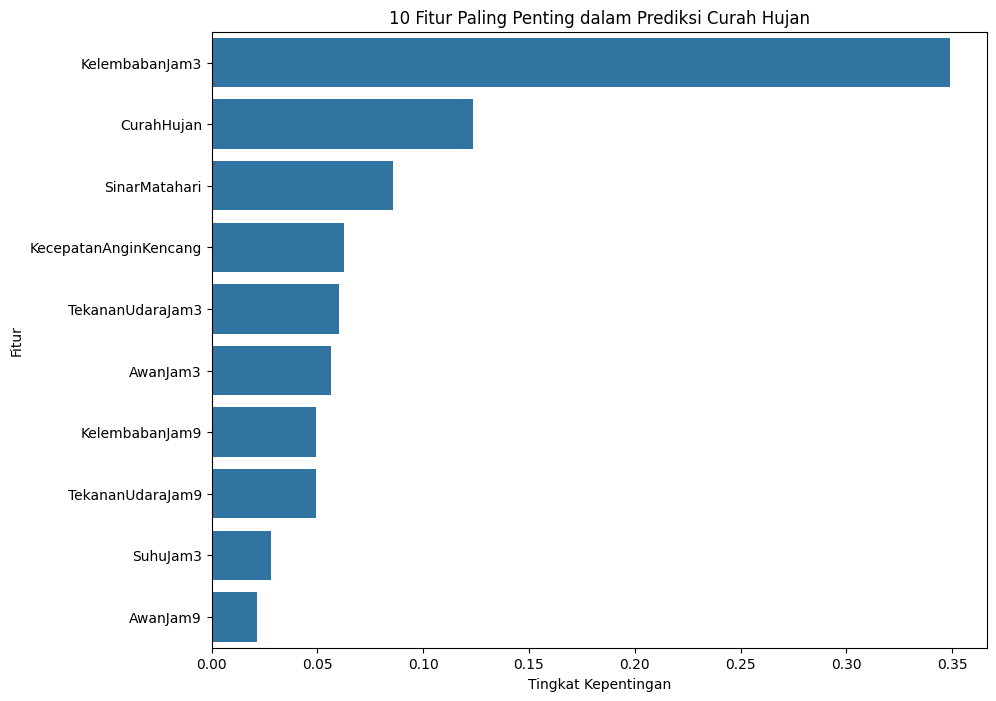

Fitur penting berdasarkan model Random Forest:


,fitur,pentingnya
12,KelembabanJam3,0.348875
2,CurahHujan,0.123542
4,SinarMatahari,0.085661
6,KecepatanAnginKencang,0.062626
14,TekananUdaraJam3,0.060216
16,AwanJam3,0.056458
11,KelembabanJam9,0.049186
13,TekananUdaraJam9,0.049146
18,SuhuJam3,0.027899
15,AwanJam9,0.021237


In [18]:
# Menampilkan fitur penting
feature_importance = pd.DataFrame({
    'fitur': X.columns,
    'pentingnya': model.feature_importances_
}).sort_values('pentingnya', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(10), x='pentingnya', y='fitur')
plt.title('10 Fitur Paling Penting dalam Prediksi Curah Hujan')
plt.xlabel('Tingkat Kepentingan')
plt.ylabel('Fitur')
plt.show()

print("Fitur penting berdasarkan model Random Forest:")
feature_importance.head(10)

In [19]:
# Contoh prediksi untuk data baru
# Membuat contoh data cuaca hari ini untuk memprediksi apakah besok akan hujan
contoh_data = X_test.iloc[0].values.reshape(1, -1)
prediksi_probabilitas = model.predict_proba(contoh_data)
prediksi_kelas = model.predict(contoh_data)

print("Contoh prediksi untuk satu sampel data:")
print(f"Probabilitas tidak hujan: {prediksi_probabilitas[0][0]:.4f}")
print(f"Probabilitas hujan: {prediksi_probabilitas[0][1]:.4f}")
print(f"Prediksi: {'Hujan' if prediksi_kelas[0] == 1 else 'Tidak Hujan'}")
print(f"Aktual: {'Hujan' if y_test.iloc[0] == 1 else 'Tidak Hujan'}")

Contoh prediksi untuk satu sampel data:
Probabilitas tidak hujan: 0.9767
Probabilitas hujan: 0.0233
Prediksi: Tidak Hujan
Aktual: Tidak Hujan


## Kesimpulan

Model Random Forest telah berhasil dilatih untuk memprediksi kemungkinan curah hujan keesokan harinya berdasarkan data cuaca historis. Model ini mencapai akurasi yang cukup baik pada data uji, dan kita juga dapat melihat faktor-faktor mana yang paling berpengaruh dalam prediksi tersebut.

Fitur-fitur seperti kelembaban, tekanan udara, dan suhu tampaknya menjadi indikator penting untuk memprediksi curah hujan keesokan harinya.